In [1]:
import numpy as np
import matplotlib.pyplot
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table,Column
from datetime import datetime
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.feature import peak_local_max
from astropy.stats import sigma_clip, gaussian_fwhm_to_sigma
from numpy.polynomial.chebyshev import chebfit, chebval
from astropy.modeling.models import Gaussian1D, Chebyshev2D
from astropy.modeling.fitting import LevMarLSQFitter
from matplotlib import gridspec, rcParams, rc
from IPython.display import Image
from uncertainties import ufloat
from uncertainties import umath
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
gainmeanarr = []
gainstdarr = []

In [4]:
home = os.path.expanduser('~')
wd = os.path.join(home, 'coding/jungmulsil/exper')
exp314path = os.path.join(wd,'3.14')
exp315path = os.path.join(wd,'3.15')
preampgainpath = os.path.join(exp314path,'preamp gain')


g5path = os.path.join(preampgainpath,'Gain5,500mV/')
g50path = os.path.join(preampgainpath,'Gain50,50mV/')

g5objpath = os.path.join(g5path,'*.CSV')
g50objpath = os.path.join(g50path,'*.CSV')

g5objlist = glob.glob(g5objpath)
g50objlist = glob.glob(g50objpath)

savepath = os.path.join(home, 'Desktop/윤서이/대학생활/4학년/1학기/중물실1/lock-in 실험/')

# Low Pass Filter 파일
#LPApath = os.path.join(subpath,'Low-Pass Amp')
#LPA2path = os.path.join(LPApath, 'rolloff6,gain1,1V')
#LPA3path = os.path.join(LPA2path, 'TC0.1')
#LPobjpath = os.path.join(LPA3path, '*.CSV')
#LPobjlist = glob.glob(LPobjpath)
#

#objlist = sorted(objlist)

In [5]:
g5objlist

['C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\1_7.8kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\2_78kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\3_168kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\4_254kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\5_362kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\6_780kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\7_981kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\8_1230kHz.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\preamp gain\\Gain5,500mV\\9_1680kHz.CSV']

## Gain 5에서

In [5]:
obj = ascii.read(g5objlist[0],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']
ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

#fig = plt.figure(1,figsize=(15,8))
#plt.plot(xarr,ch1arr,label='ch1')
#plt.plot(xarr,ch2arr,label='ch2')
#for i in range(len(ch1peak)) :
    #plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

#plt.legend()
#plt.show()



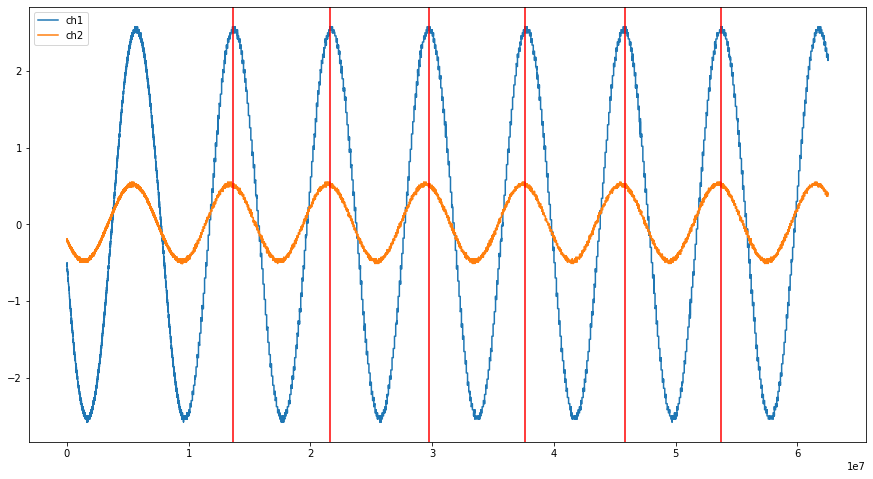

In [6]:
obj = ascii.read(g5objlist[1],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']
ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



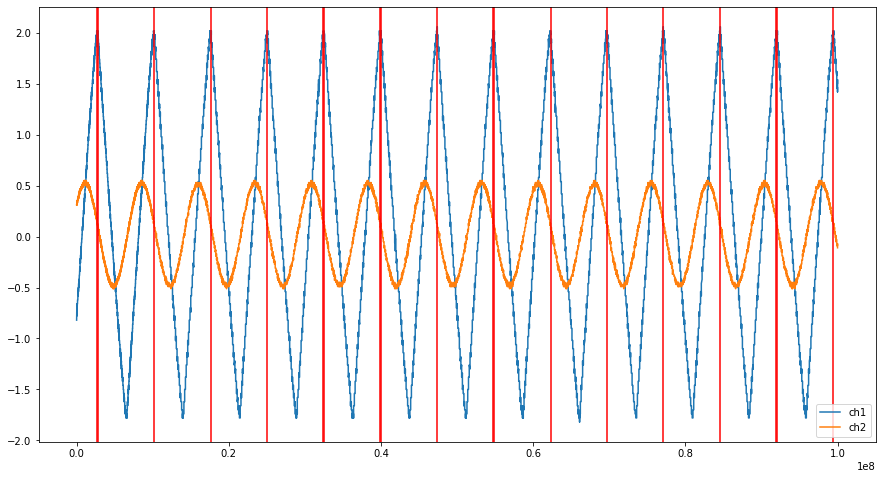

In [7]:
obj = ascii.read(g5objlist[2],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:80000]
ch1arr = ch1arr[:80000]
ch2arr = ch2arr[:80000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



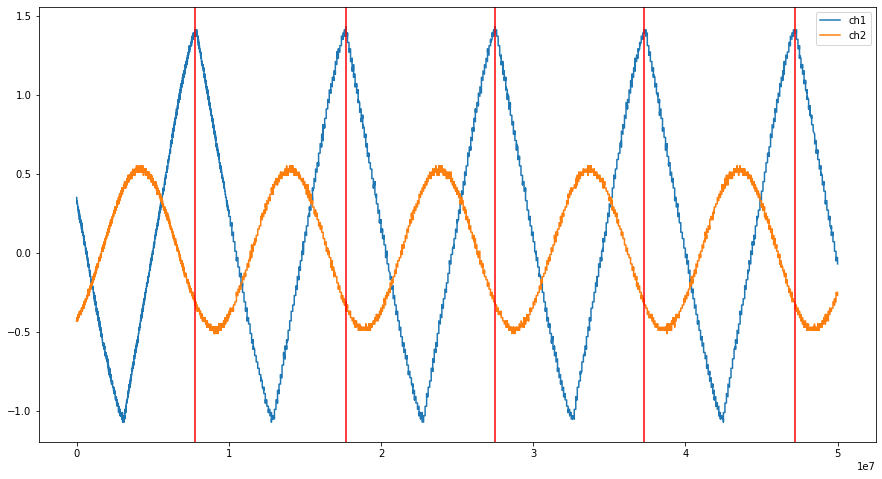

In [8]:
obj = ascii.read(g5objlist[3],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



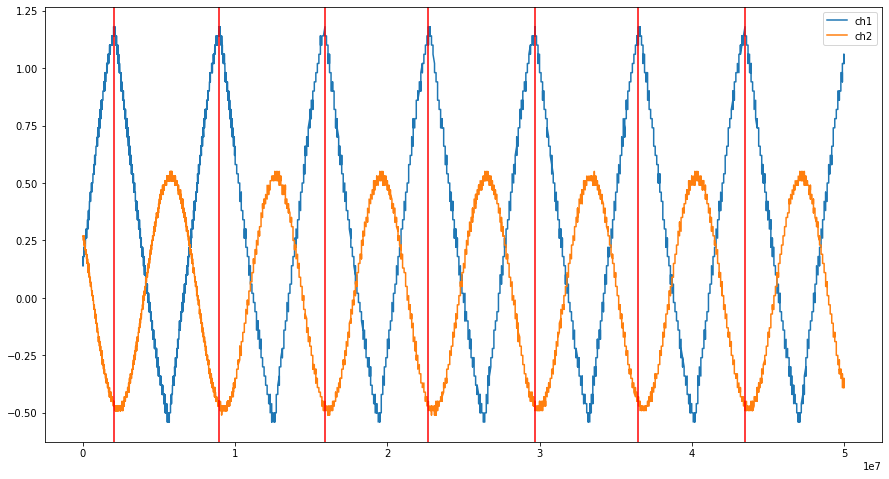

In [9]:
obj = ascii.read(g5objlist[4],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



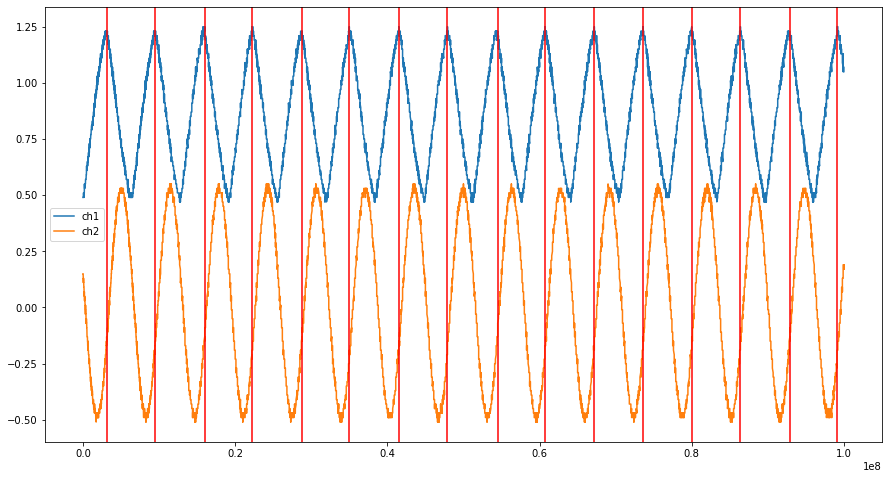

In [10]:
obj = ascii.read(g5objlist[5],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



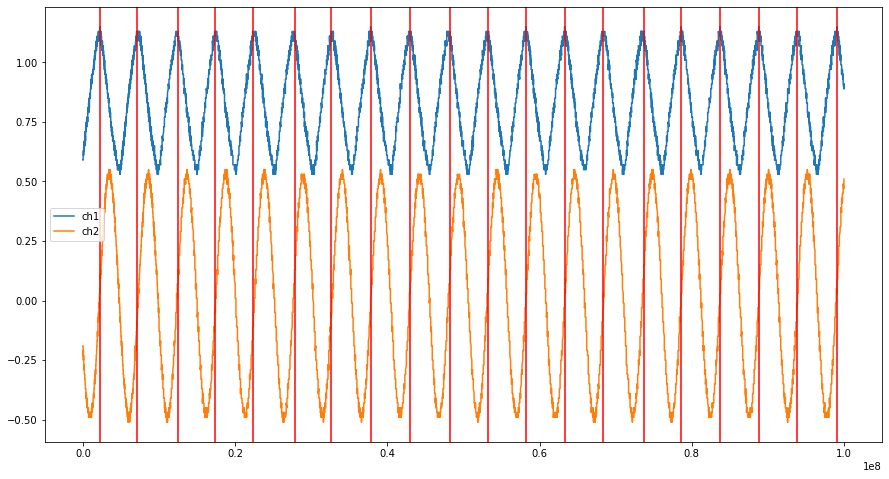

In [11]:
obj = ascii.read(g5objlist[6],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



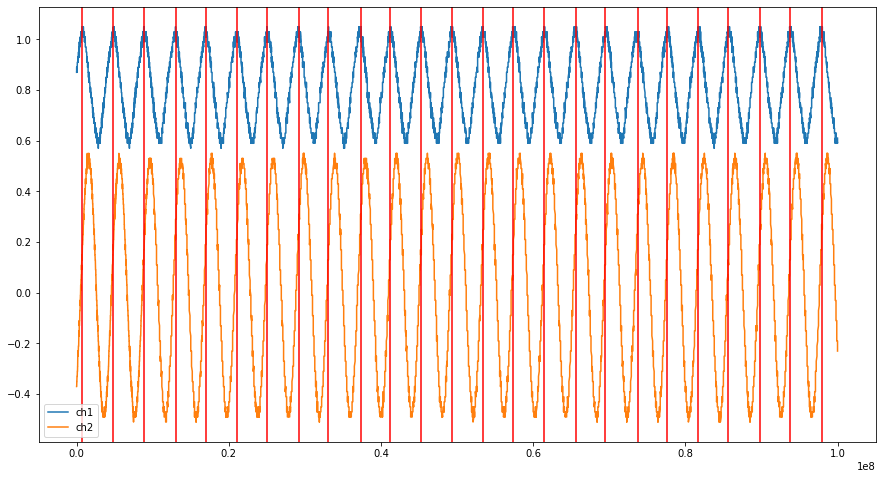

In [12]:
obj = ascii.read(g5objlist[7],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



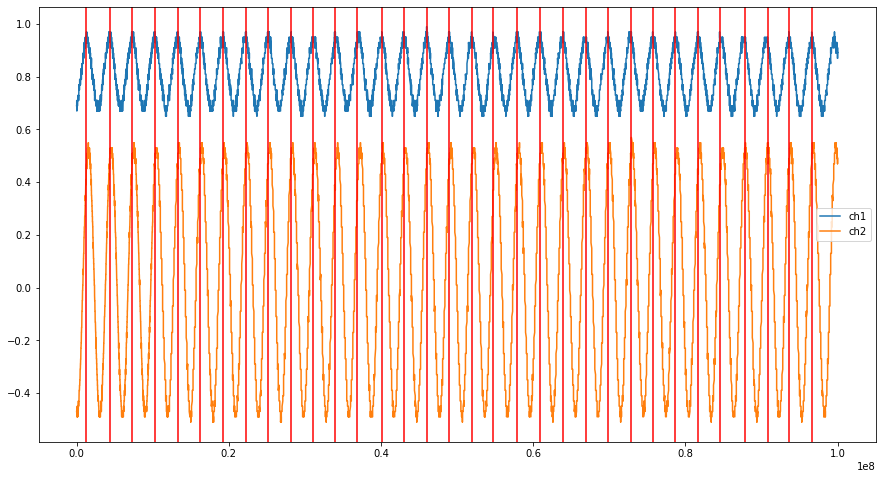

In [13]:
obj = ascii.read(g5objlist[8],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:20000]
ch1arr = ch1arr[:20000]
ch2arr = ch2arr[:20000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

    
    
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    #print(gainarr)
    #print('')
    
gainmeanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



In [14]:
GainMeanArr = []
GainStdArr = []
for i in range(len(gainmeanarr)) :
    GainMeanArr.append(gainmeanarr[i].n)
    GainStdArr.append(gainmeanarr[i].s)
#print(GainMeanArr)
x = [7800,78000,168000,254000,362000,780000,981000,1230000,1680000]

# 평평한 곳의 dB 계산
horizon = np.mean(GainMeanArr[0:2])
#horizon = 20*np.log10(horizon)
#3dB Frequency 계산
freq3 = horizon - 3

x = x[3:]
GainMeanArr = GainMeanArr[3:]
GainStdArr = GainStdArr[3:]
#
x = np.array(x)
GainMeanArr = np.array(GainMeanArr)


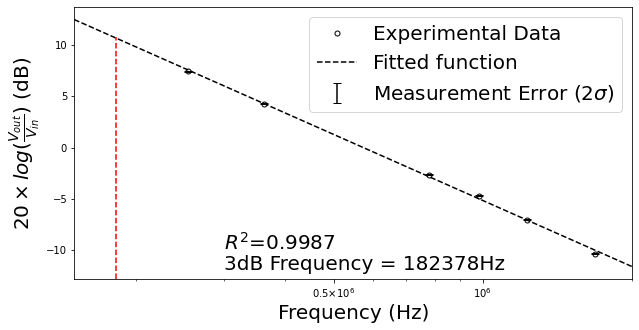

In [15]:
logx = np.log10(x)
coeff1, res, _, _, _=np.polyfit(logx,GainMeanArr,1,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx = np.linspace(1.5*10**5,2*10**6,10000)
logxx = np.log10(xx)


idx = np.where((f(coeff1,logxx) < freq3 + 0.005) & (f(coeff1,logxx) > freq3 -0.005))

r2 = r2_score(GainMeanArr,f(coeff1,logx))





fig = plt.figure(1,figsize=(10,5))
plt.plot(x,GainMeanArr,'o',color='black',ms=5,mfc='white', label='Experimental Data')
plt.plot(xx,f(coeff1,np.log10(xx)),color='black',linestyle='--',label=f'Fitted function')
plt.errorbar(x,GainMeanArr,yerr=np.array(GainStdArr)*2,linestyle='None',capsize=4,label='Measurement Error (2$\sigma$)',color='black')
plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.ylabel('$20 \\times log(\\frac{V_{out}}{V_{in}})$ (dB)', fontsize = 20)
plt.xlim(1.5*10**5,2*10**6)
plt.xscale('log')
plt.axvline(xx[idx],linestyle='--',color='red',ymax=0.89)
#plt.axhline(f(coeff1,logxx)[idx[0]][0])
plt.legend(fontsize = 20)
plt.text(0.3e6,-10,f'$R^2$={r2:.4f}',fontsize=20)
plt.text(0.3e6,-12,f'3dB Frequency = {xx[idx][0]:.0f}Hz',fontsize=20)
plt.xticks([0.5e6,1e6],['0.5$\\times 10^6$','$10^6$'])
#plt.show()
plt.savefig(savepath + 'exp1_fitted1.png', dpi=300)

## Gain 50에서 

In [16]:
gain50meanarr = []

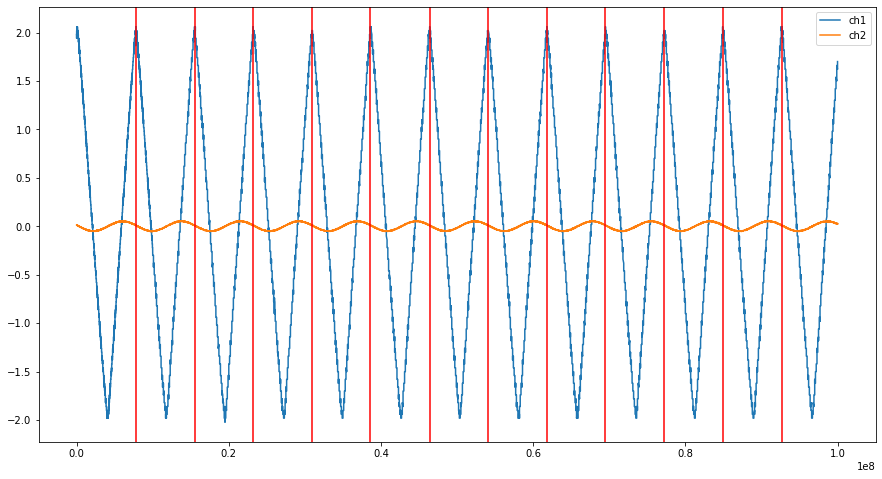

In [17]:
obj = ascii.read(g50objlist[0],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:80000]
ch1arr = ch1arr[:80000]
ch2arr = ch2arr[:80000]

ch1peak = peak_local_max(ch1arr, min_distance=10**3,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



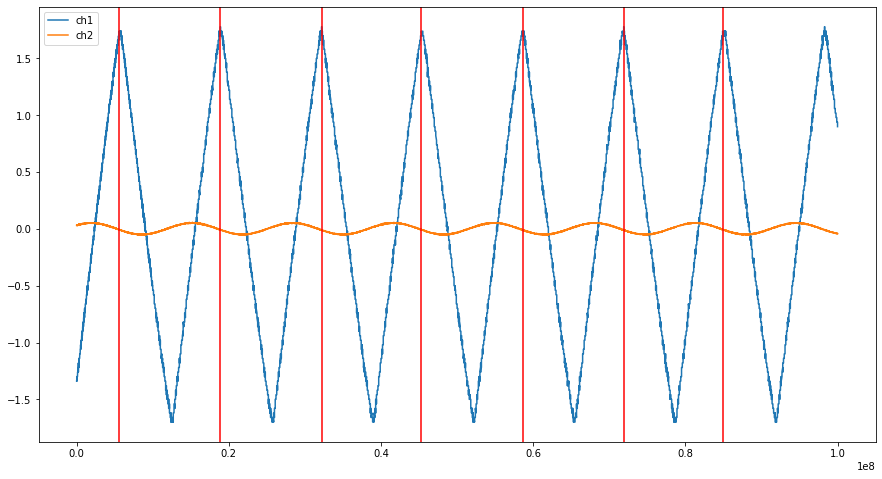

In [18]:
obj = ascii.read(g50objlist[1],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:40000]
ch1arr = ch1arr[:40000]
ch2arr = ch2arr[:40000]

ch1peak = peak_local_max(ch1arr, min_distance=10**3,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



In [19]:
gain50meanarr

[31.436728775641676+/-0.12108982662574805,
 30.076511562217117+/-0.16325790246147687]

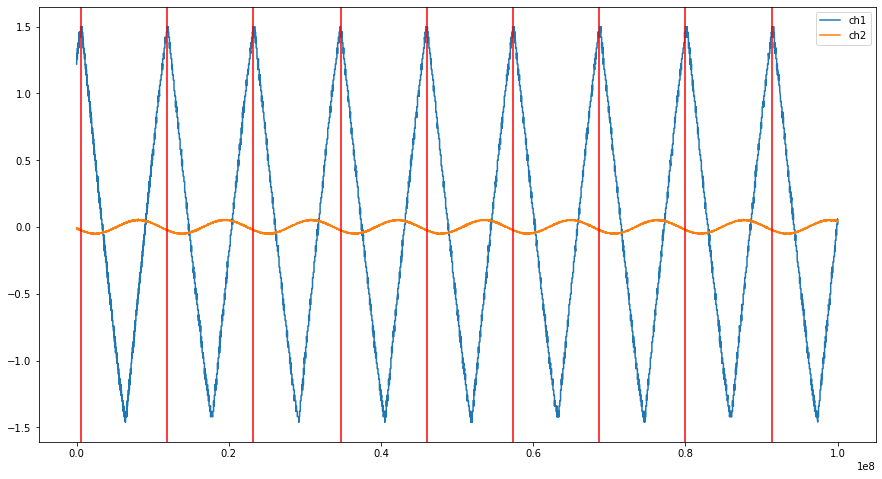

In [20]:
obj = ascii.read(g50objlist[2],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:40000]
ch1arr = ch1arr[:40000]
ch2arr = ch2arr[:40000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



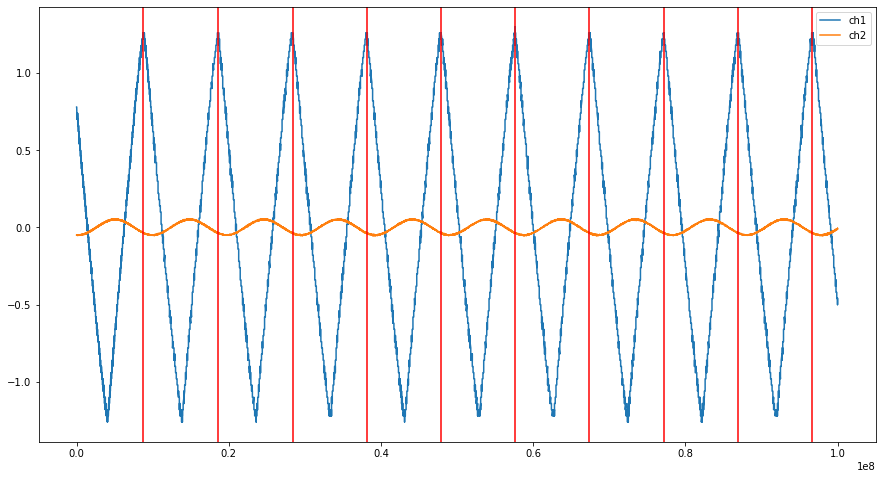

In [21]:
obj = ascii.read(g50objlist[3],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:40000]
ch1arr = ch1arr[:40000]
ch2arr = ch2arr[:40000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



In [22]:
20*np.log10(50)

33.979400086720375

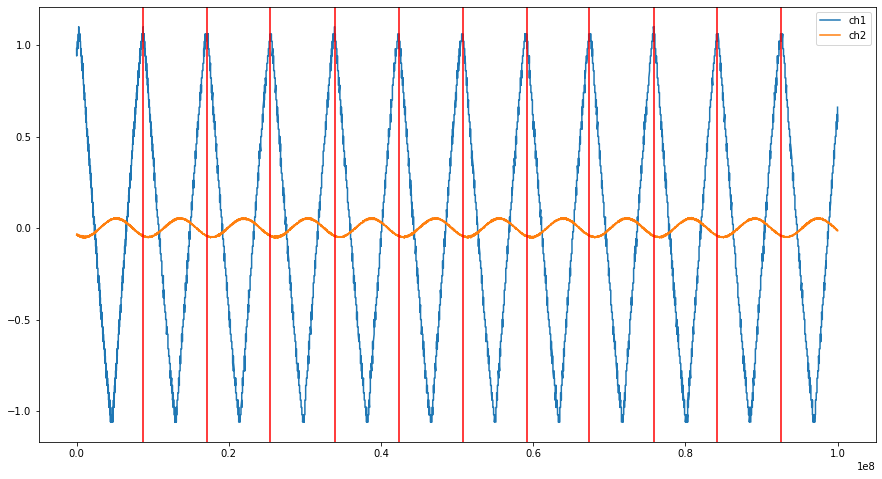

In [23]:
obj = ascii.read(g50objlist[4],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:40000]
ch1arr = ch1arr[:40000]
ch2arr = ch2arr[:40000]

ch1peak = peak_local_max(ch1arr, min_distance=10**3,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    
    
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



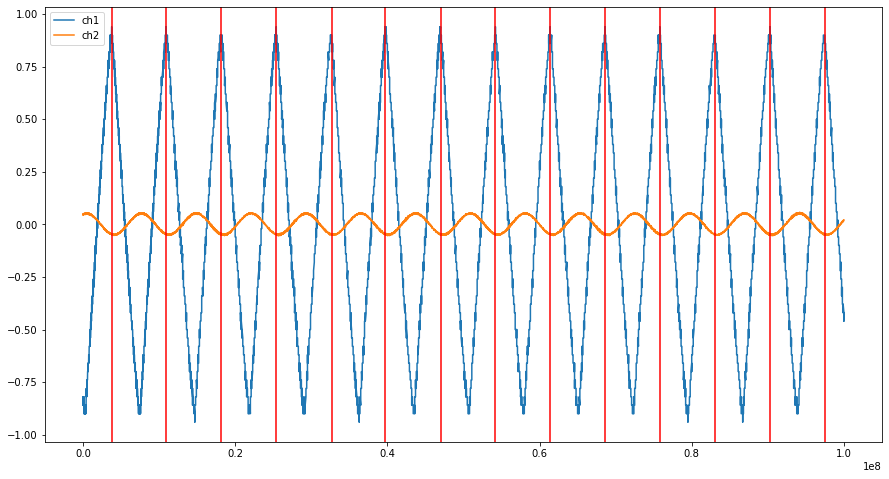

In [24]:
obj = ascii.read(g50objlist[5],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:40000]
ch1arr = ch1arr[:40000]
ch2arr = ch2arr[:40000]

ch1peak = peak_local_max(ch1arr, min_distance=10**2,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
#ch1foot = peak_local_max(ch1rev, min_distance=10**4,threshold_abs= 0)

#point = ch1arr[0]
#idx = np.where(ch1arr==point)

fig = plt.figure(1,figsize=(15,8))
plt.plot(xarr,ch1arr,label='ch1')
plt.plot(xarr,ch2arr,label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='red')
    #plt.axvline(xarr[ch1foot[i]],color='red')

gainarr = []

for i in range(len(ch1peak)-1) :
    #xtemp = xarr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1temp = ch1arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch2temp = ch2arr[ch1peak[i][0]:ch1peak[i+1][0]]
    ch1amp = np.max(ch1temp)-np.min(ch1temp)
    ch1amp = ufloat(ch1amp,0.005)
    ch2amp = np.max(ch2temp)-np.min(ch2temp)
    ch2amp = ufloat(ch2amp,0.005)
    gainarr.append(20*umath.log10(ch1amp/ch2amp))
    #print(gainarr)
    #print('')
gain50meanarr.append(np.mean(gainarr))
#gainstdarr.append(np.std(gainarr))

plt.legend()
plt.show()



In [25]:
Gain50MeanArr = []
Gain50StdArr = []
for i in range(len(gain50meanarr)) :
    Gain50MeanArr.append(gain50meanarr[i].n)
    Gain50StdArr.append(gain50meanarr[i].s)
    
x = [162000,189000,220000,256000,298000,347000]

# 평평한 곳의 dB 계산
horizon = 20*np.log10(50)
#horizon = 20*np.log10(horizon)
#3dB Frequency 계산
freq3 = horizon - 3

#x = x[3:]
#GainMeanArr = GainMeanArr[3:]
#GainStdArr = GainStdArr[3:]

x = np.array(x)
GainMeanArr = np.array(GainMeanArr)


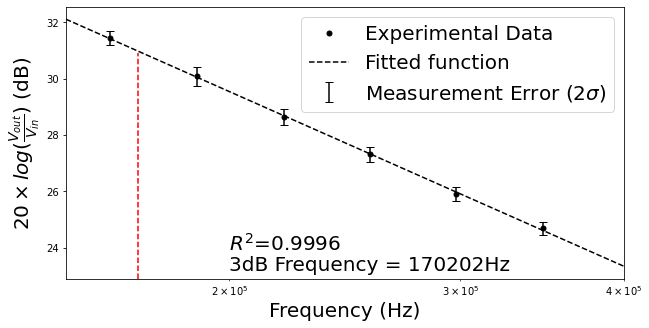

In [26]:
logx = np.log10(x)
coeff1, res, _, _, _=np.polyfit(logx,Gain50MeanArr,1,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx = np.linspace(1.5*10**5,4*10**5,10000)
logxx = np.log10(xx)


idx = np.where((f(coeff1,logxx) < freq3 + 0.001) & (f(coeff1,logxx) > freq3 -0.001))

r2 = r2_score(Gain50MeanArr,f(coeff1,logx))



fig = plt.figure(1,figsize=(10,5))
plt.plot(x,Gain50MeanArr,'o',color='black',ms=5,mfc='black', label='Experimental Data')
plt.plot(xx,f(coeff1,np.log10(xx)),color='black',linestyle='--',label=f'Fitted function')
plt.errorbar(x,Gain50MeanArr,yerr=np.array(Gain50StdArr)*2,linestyle='None',capsize=4,label='Measurement Error (2$\sigma$)',color='black')
plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.ylabel('$20 \\times log(\\frac{V_{out}}{V_{in}})$ (dB)', fontsize = 20)
plt.xlim(1.5*10**5,4*10**5)
plt.xscale('log') 
plt.axvline(xx[idx][0],linestyle='--',color='red',ymax=0.83)
#plt.axhline(f(coeff1,logxx)[idx[0]][0])
plt.legend(fontsize = 20)
plt.text(2e5,23.9,f'$R^2$={r2:.4f}',fontsize=20)
plt.text(2e5,23.2,f'3dB Frequency = {xx[idx][0]:.0f}Hz',fontsize=20)
#plt.show()
plt.savefig(savepath + 'exp1_fitted2.png', dpi=300)



# 2. Phase Shift 계산

In [82]:
exp314path
PhasePath = os.path.join(exp314path,'phase_1V')
PhaseObjPath = os.path.join(PhasePath,'*.CSV')
PhaseObjList = glob.glob(PhaseObjPath)
del(PhaseObjList[-1])
sorted(PhaseObjList)

['C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\1_10.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\2_30.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\3_90.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\4_270.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\5_810.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\6_2430.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\7_7290.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\8_21870.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\99_196830.CSV',
 'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\9_65610.CSV']

In [83]:
PhaseShiftArr = []

-82.9493+/-0.0015


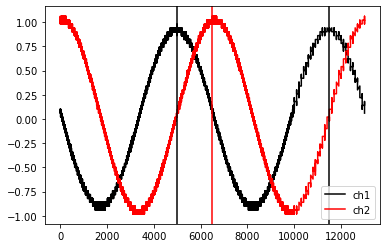

In [84]:
obj = ascii.read(PhaseObjList[0],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)




###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.0205)
peak200 = ufloat(peak200,0.0205)
peak110 = ufloat(peak110,0.0205)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift)

print(PhaseShift)

plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

-0.39474+/-0.00028


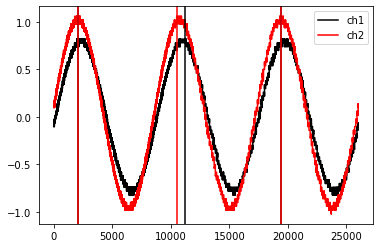

In [85]:
obj = ascii.read(PhaseObjList[1],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)
ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift)


print(PhaseShift)
#fig = plt.figure(1,figsize=())
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

124.20382+/-0.00012


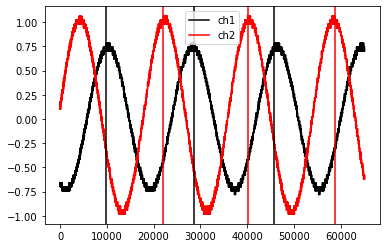

In [86]:
obj = ascii.read(PhaseObjList[2],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)


print(PhaseShift+360)
#fig = plt.figure(1,figsize=(100,50))

plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

219.58506+/-0.00009


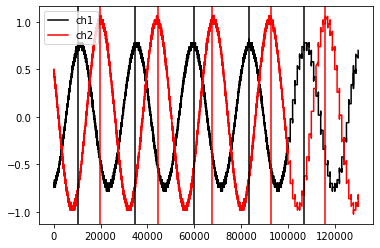

In [87]:
obj = ascii.read(PhaseObjList[3],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)


print(PhaseShift+360)

plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

335.09434+/-0.00008


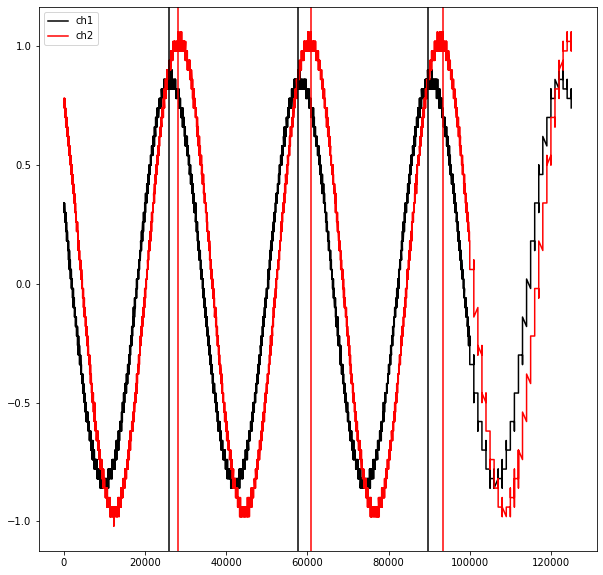

In [88]:
obj = ascii.read(PhaseObjList[4],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:60000]
ch1arr = ch1arr[:60000]
ch2arr = ch2arr[:60000]


ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)

print(PhaseShift+360)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

In [89]:
PhaseObjList[5]

'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\6_2430.CSV'

417.042254+/-0.000010


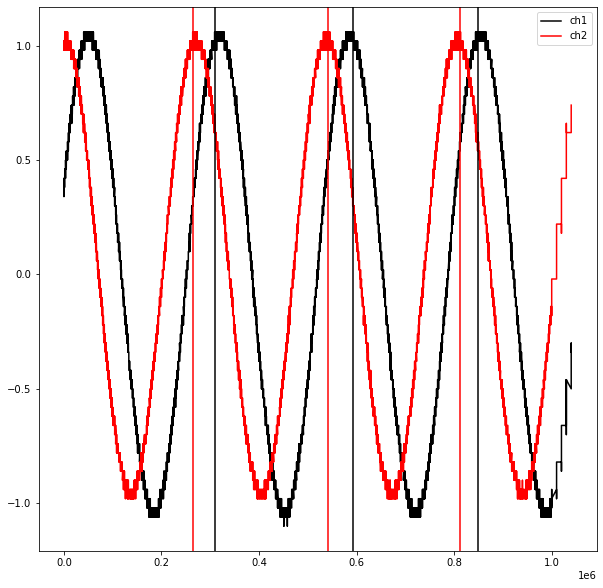

In [90]:
obj = ascii.read(PhaseObjList[5],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:100000]
ch1arr = ch1arr[:100000]
ch2arr = ch2arr[:100000]


ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)


print(PhaseShift+360)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

494.8314607+/-0.0000012


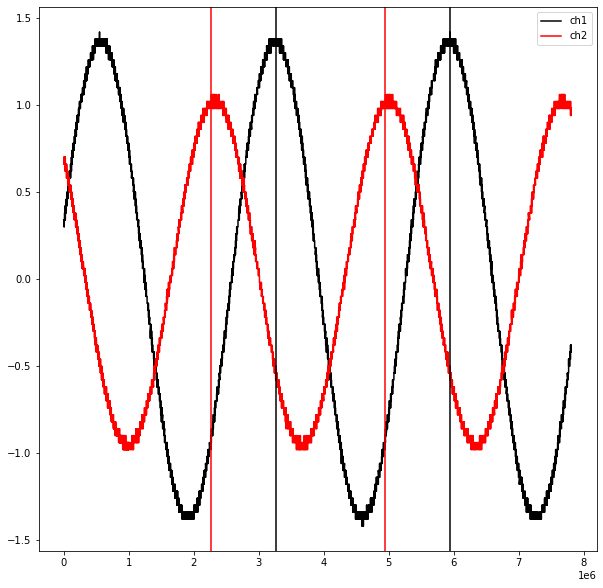

In [91]:
obj = ascii.read(PhaseObjList[6],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:100000]
ch1arr = ch1arr[:100000]
ch2arr = ch2arr[:100000]


ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)

print(PhaseShift+360)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

In [92]:
PhaseObjList[7]

'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\8_21870.CSV'

515.5678670+/-0.0000009


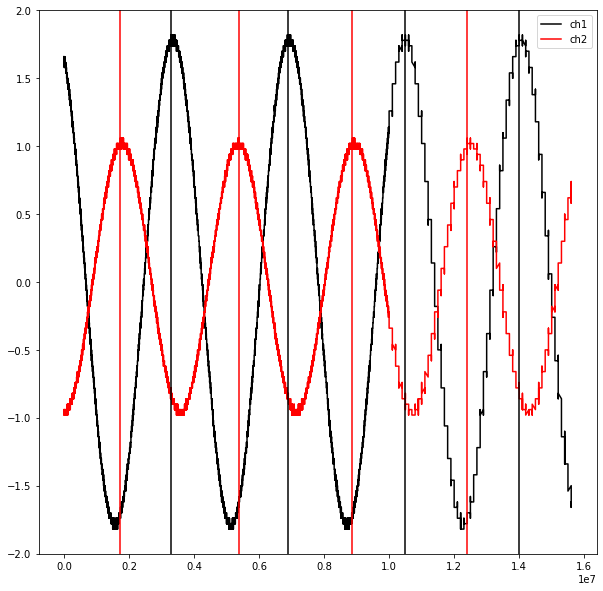

In [93]:
obj = ascii.read(PhaseObjList[7],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:100000]
ch1arr = ch1arr[:100000]
ch2arr = ch2arr[:100000]


ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)

print(PhaseShift+360)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

In [94]:
PhaseObjList[9]

'C:\\Users\\user\\coding/jungmulsil/exper\\3.14\\phase_1V\\9_65610.CSV'

536.775553+/-0.000035


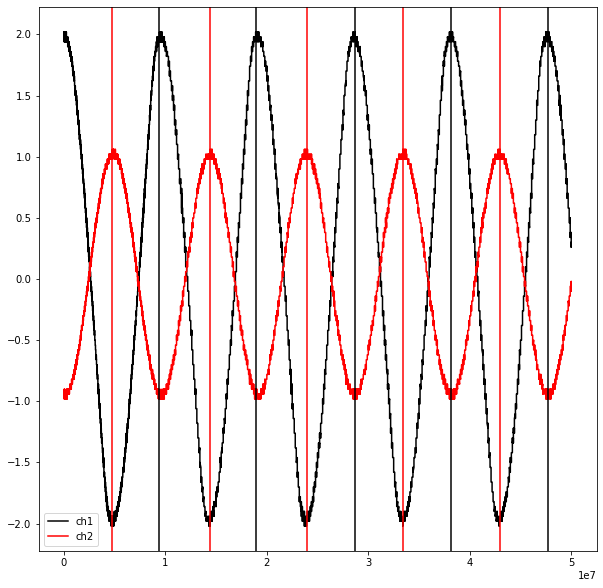

In [95]:
obj = ascii.read(PhaseObjList[9],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:80000]
ch1arr = ch1arr[:80000]
ch2arr = ch2arr[:80000]


ch1peak = peak_local_max(ch1arr, min_distance=10**3,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**3,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.5)
peak200 = ufloat(peak200,0.5)
peak110 = ufloat(peak110,0.5)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+360)

print(PhaseShift+360)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

9번 좀 이상함

721.12587959+/-0.00000020


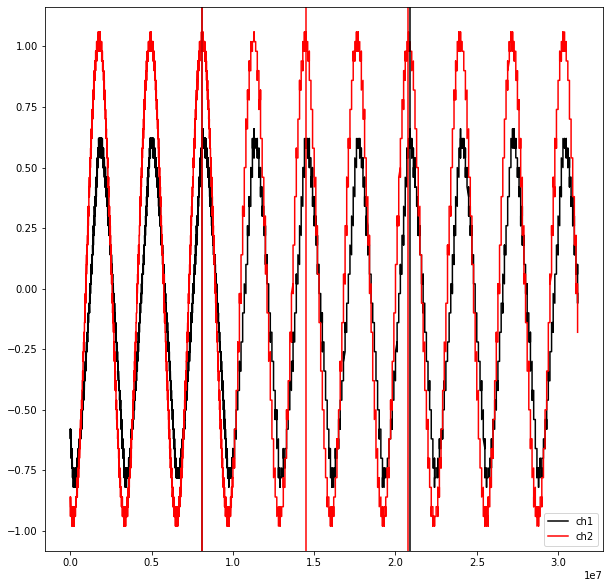

In [96]:
obj = ascii.read(PhaseObjList[8],format='csv')
xarr = obj['TIME']
ch1arr = obj['CH1']
ch2arr = obj['CH2']

xarr = xarr[:50000]
ch1arr = ch1arr[:50000]
ch2arr = ch2arr[:50000]


ch1peak = peak_local_max(ch1arr, min_distance=10**4,threshold_abs= 0)
ch1peak = ch1peak.tolist()
ch1peak = sorted(ch1peak)

ch2peak = peak_local_max(ch2arr, min_distance=10**4,threshold_abs= 0)
ch2peak = ch2peak.tolist()
ch2peak = sorted(ch2peak)


###오차범위 집어넣기 

peak100 = xarr[ch1peak[0][0]]
peak200 = xarr[ch2peak[0][0]]
peak110 = xarr[ch1peak[1][0]]

peak100 = ufloat(peak100,0.005)
peak200 = ufloat(peak200,0.005)
peak110 = ufloat(peak110,0.005)

###

delta_phase = peak100 - peak200
period = peak110 - peak100
PhaseShift = delta_phase/period*360
PhaseShiftArr.append(PhaseShift+720)

print(PhaseShift+720)

fig = plt.figure(1,figsize=(10,10))
plt.plot(xarr,ch1arr,'black', label='ch1')
plt.plot(xarr,ch2arr,'red',label='ch2')
for i in range(len(ch1peak)) :
    plt.axvline(xarr[ch1peak[i]],color='black')
    
for i in range(len(ch2peak)) :
        plt.axvline(xarr[ch2peak[i]],color='red')
plt.legend()
plt.show()

In [97]:
PhaseShiftArr

[-82.94930875576037+/-0.001454135376286229,
 -0.39473684210526316+/-0.0002789681968326292,
 124.20382165605096+/-0.00011887298690646772,
 219.5850622406639+/-9.22091121995789e-05,
 335.0943396226415+/-7.74294856840858e-05,
 417.0422535211268+/-9.751329072913101e-06,
 494.8314606741573+/-1.1734233877304277e-06,
 515.5678670360111+/-8.971943673359955e-07,
 536.7755532139093+/-3.530336675643065e-05,
 721.1258795934324+/-1.9934122908094897e-07]

## 2번실험 오차를 어떻게 하기로 했지?

In [98]:
Errarr = []
for i in range(len(x)) :
    Errarr.append(360*0.02)

In [101]:
PhaseErrArr

array([1.45413538e-03, 2.78968197e-04, 1.18872987e-04, 9.22091122e-05,
       7.74294857e-05, 9.75132907e-06, 1.17342339e-06, 8.97194367e-07,
       3.53033668e-05, 1.99341229e-07])

C:\Users\user\AppData\Local\Temp/ipykernel_9976/2763769107.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x,PhaseShiftArr2, 'o',color='black', label='Experimental Data',marker='.',markersize=10,markerfacecolor='white')


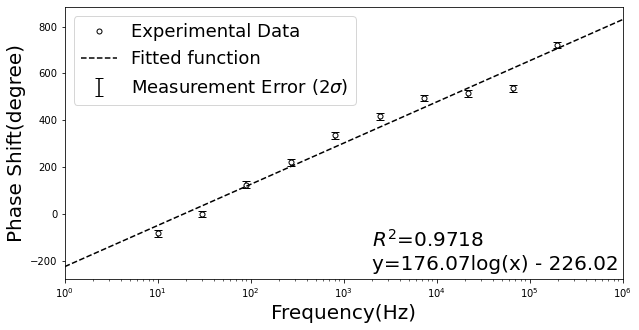

In [105]:

x = [10,30,90,270,810,2430,7290,21870,65610,196830]
x = np.array(x)
logx = np.log10(x)


PhaseShiftArr2 = []
for i in range(len(PhaseShiftArr)) :
    PhaseShiftArr2.append(PhaseShiftArr[i].n)
    
#PhaseErrArr = []
#for i in range(len(PhaseShiftArr)) :
#    PhaseErrArr.append(PhaseShiftArr[i].s)
    
    
PhaseErrArr = []
for i in range(len(PhaseShiftArr)) :
    PhaseErrArr.append(Errarr[i])
    
    
PhaseErrArr = np.array(PhaseErrArr)


coeff1, res, rank, _, _=np.polyfit(logx,PhaseShiftArr2,1,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx = np.logspace(0,6,10**5)
r2 = r2_score(PhaseShiftArr2,f(coeff1,np.log10(x)))
errarr = []

fig = plt.figure(1,figsize=(10,5))
plt.plot(x,PhaseShiftArr2, 'o',color='black', label='Experimental Data',marker='.',markersize=10,markerfacecolor='white')
plt.plot(xx,f(coeff1,np.log10(xx)),color='black',linestyle='--', label='Fitted function')
plt.errorbar(x,PhaseShiftArr2,yerr=PhaseErrArr*2,linestyle='None',capsize=4,label='Measurement Error ($2\sigma$)',color='black')
#plt.errorbar(x,PhaseShiftArr2,yerr=Errarr,fmt='none',capsize=4,label='Measurement Error (2$\sigma$)',color='black')
plt.xlim(1,10**6)
plt.xlabel('Frequency(Hz)',fontsize=20)
plt.ylabel('Phase Shift(degree)',fontsize=20)
plt.legend(fontsize = 18)
plt.text(10**4*0.2,-140,f'$R^2$={r2:.4f}',fontsize=20)
plt.text(10**4*0.2,-240,f'y={coeff1[0]:.2f}log(x) - {abs(coeff1[1]):.2f}',fontsize=20)
plt.xscale('log')
plt.savefig(savepath + 'exp2_fitted.png', dpi=300)



In [47]:
#vv = np.var(PhaseShiftArr)/(np.var(logx)*9)

#vv**0.5

# 실험3

In [48]:
ppp = os.path.join(wd,'dbm *.CSV')
ppp = glob.glob(ppp)

In [49]:
obj1 = ascii.read(ppp[0],format='csv')
obj2 = ascii.read(ppp[1],format='csv')
obj3 = ascii.read(ppp[2],format='csv')
obj4 = ascii.read(ppp[3],format='csv')


xarr1 = obj1['TIME']
xarr2 = obj2['TIME']
xarr3 = obj3['TIME']
xarr4 = obj4['TIME']

ch1arr1 = obj1['CH1']
ch1arr2 = obj2['CH1']
ch1arr3 = obj3['CH1']
ch1arr4 = obj4['CH1']

ch2arr1 = obj1['CH2']
ch2arr2 = obj2['CH2']
ch2arr3 = obj3['CH2']
ch2arr4 = obj4['CH2']

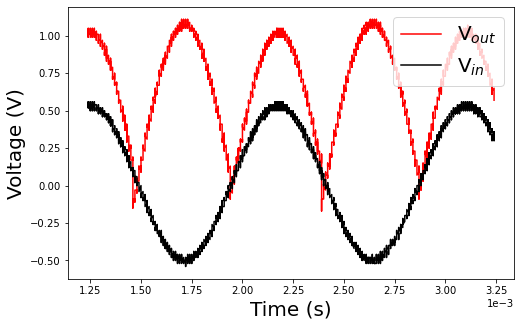

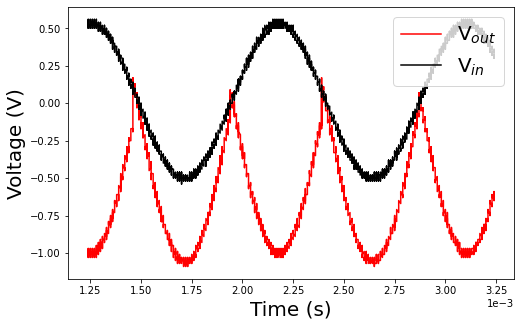

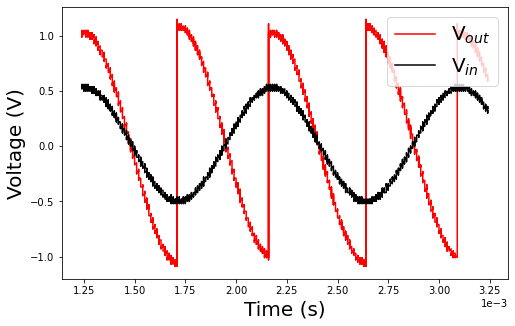

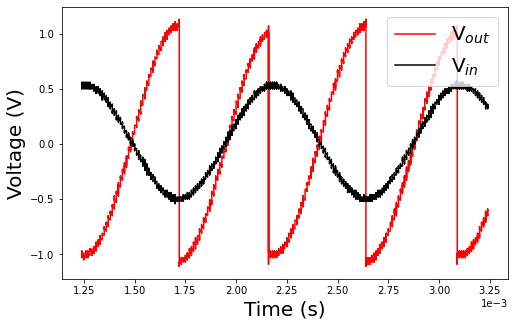

In [50]:
rang = []
for i in range(9) :
    rang.append(0.001*i)



fig,ax = plt.subplots(1,figsize=(8,5))
plt.plot(xarr1,ch1arr1,color='red',label='V$_{out}$')
plt.plot(xarr1,ch2arr1,color='black',label='V$_{in}$')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=20,loc = 'upper right')
plt.savefig(savepath + 'exp3_fitted1.png', dpi=300)


fig,ax = plt.subplots(1,figsize=(8,5))
plt.plot(xarr2,ch1arr2,color='red',label='V$_{out}$')
plt.plot(xarr2,ch2arr2,color='black',label='V$_{in}$')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=20,loc = 'upper right')
plt.savefig(savepath + 'exp3_fitted2.png', dpi=300)


fig,ax = plt.subplots(1,figsize=(8,5))
plt.plot(xarr3,ch1arr3,color='red',label='V$_{out}$')
plt.plot(xarr3,ch2arr3,color='black',label='V$_{in}$')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=20,loc = 'upper right')
plt.savefig(savepath + 'exp3_fitted3.png', dpi=300)

fig,ax = plt.subplots(1,figsize=(8,5))
plt.plot(xarr4,ch1arr4,color='red',label='V$_{out}$')
plt.plot(xarr4,ch2arr4,color='black',label='V$_{in}$')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize=20,loc = 'upper right')
plt.savefig(savepath + 'exp3_fitted4.png', dpi=300)

plt.show()

# 실험 4 Low-Pass Amp

In [51]:
LPAPath = os.path.join(exp315path,'Low-Pass Amp')
RO6Path =os.path.join(LPAPath,'rolloff6,gain1,1V')
RO12Path =os.path.join(LPAPath,'rolloff12,gain1,1V')
R06T003Path = os.path.join(RO6Path,'시상0.03')
RO6T003ObjPath = os.path.join(R06T003Path,'*.CSV')
RO6T003ObjPath = glob.glob(RO6T003ObjPath)
#RO6T003ObjPath

## i) rolloff 6, 시상 0.03

In [52]:
np.mean([169.9,176.37])

173.135

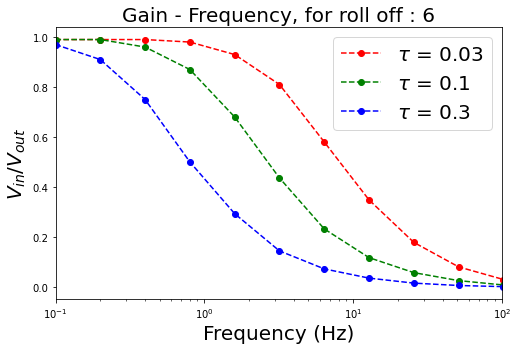

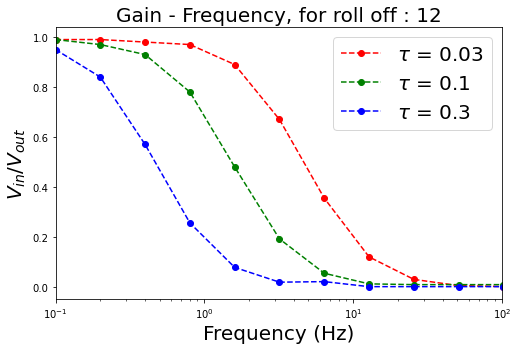

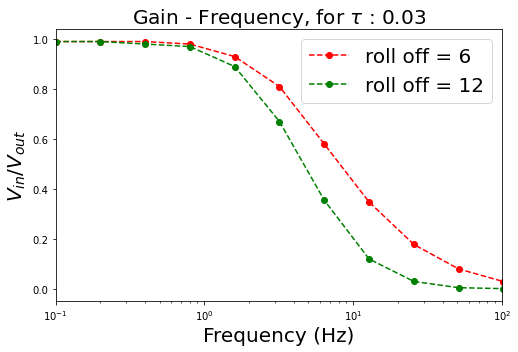

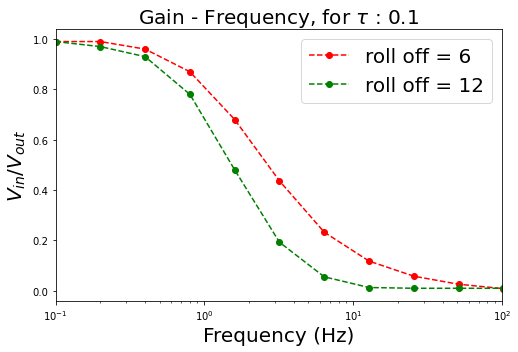

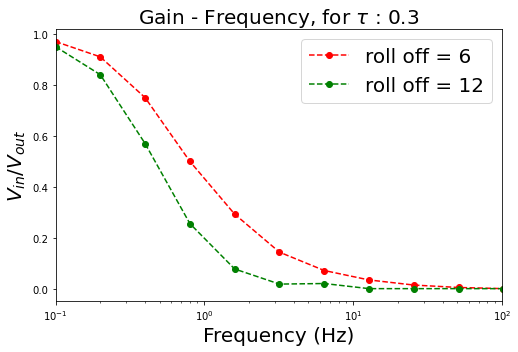

In [53]:
Vin = []


freq = np.array([0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4])
for i in range(len(freq)) :
    Vin.append(2)
Vin = np.array(Vin)

R6T03Vout = np.array([1.98,1.98,1.98,1.96,1.86,1.62,1.16,0.696,0.356,0.16,0.059])
R6T03VGain = R6T03Vout/Vin
R6T03Verr = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,1,1,1,1])

R6T1Vout = np.array([1.98,1.98,1.92,1.74,1.36,0.872,0.464,0.234,0.114,0.05,0.015])
R6T1VGain = R6T1Vout/Vin
R6T1Verr = np.array([0.01,0.01,0.01,0.01,0.01,1,1,2,2,1,2])

R6T3Vout = np.array([1.94,1.82,1.5,1,0.586,0.288,0.144,0.07,0.03,0.011,0.0018])
R6T3VGain = R6T3Vout/Vin
R6T3Verr = np.array([0.01,0.01,0.01,0.01,1,1,1,2,2,2,1])

R12T03Vout = np.array([1.98,1.98,1.96,1.94,1.78,1.34,0.71,0.24,0.06,0.01,0.0024])
R12T03VGain = R12T03Vout/Vin
R12T03Verr = np.array([0.01,0.01,0.01,0.01,0.01,0.01,1,5,5,5,1.6])

R12T1Vout = np.array([1.98,1.94,1.86,1.56,0.96,0.384,0.109,0.024,0.018,0.018,0.018])
R12T1VGain = R12T1Vout/Vin
R12T1Verr = np.array([0.01,0.01,0.01,0.01,1,1,3,0.8,1,1,1])

R12T3Vout = np.array([1.9,1.68,1.14,0.512,0.156,0.0376,0.042,0.0018,0.0018,0.0018,0.0018])
R12T3VGain = R12T3Vout/Vin
R12T3Verr = np.array([0.01,0.01,0.01,1,1,0.1,2.2,1,1,1,1])

wc = 1/0.1

def fa(x,k,w) :
    return k/(1+x/w)

xx = np.linspace(0.001,10500,100000)


fig = plt.figure(1,figsize=(8,5))
plt.plot(freq,R6T03VGain,'o--',label='$\\tau$ = 0.03',color='red')
plt.plot(freq,R6T1VGain,'o--',label='$\\tau$ = 0.1',color='green')
plt.plot(freq,R6T3VGain,'o--',label='$\\tau$ = 0.3',color='blue')


#plt.plot(xx,fa(xx,1,wc),color='red',linestyle='--')
plt.xlim(0.1,100)
#plt.ylim(0,2.5)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('$V_{in}/V_{out}$',fontsize=20)
plt.legend(fontsize=20)
plt.xscale('log')
plt.title('Gain - Frequency, for roll off : 6',fontsize=20)
plt.savefig(savepath + 'exp4_fitted1.png', dpi=300)

plt.show()






fig = plt.figure(1,figsize=(8,5))
plt.plot(freq,R12T03VGain,'o--',label='$\\tau$ = 0.03',color='red')
plt.plot(freq,R12T1VGain,'o--',label='$\\tau$ = 0.1',color='green')
plt.plot(freq,R12T3VGain,'o--',label='$\\tau$ = 0.3',color='blue')

#plt.plot(xx,fa(xx,1,wc),color='red',linestyle='--')
plt.xlim(0.1,100)
#plt.ylim(0,2.5)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('$V_{in}/V_{out}$',fontsize=20)
plt.legend(fontsize=20)
plt.xscale('log')
plt.title('Gain - Frequency, for roll off : 12',fontsize=20)
plt.savefig(savepath + 'exp4_fitted2.png', dpi=300)
plt.show()







fig = plt.figure(1,figsize=(8,5))
plt.plot(freq,R6T03VGain,'o--',label='roll off = 6',color='red')
plt.plot(freq,R12T03VGain,'o--',label='roll off = 12',color='green')

#plt.plot(xx,fa(xx,1,wc),color='red',linestyle='--')
plt.xlim(0.1,100)
#plt.ylim(0,2.5)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('$V_{in}/V_{out}$',fontsize=20)
plt.legend(fontsize=20)
plt.xscale('log')
plt.title('Gain - Frequency, for $\\tau$ : 0.03',fontsize=20)
plt.savefig(savepath + 'exp4_fitted3.png', dpi=300)
plt.show()







fig = plt.figure(1,figsize=(8,5))
plt.plot(freq,R6T1VGain,'o--',label='roll off = 6',color='red')
plt.plot(freq,R12T1VGain,'o--',label='roll off = 12',color='green')

#plt.plot(xx,fa(xx,1,wc),color='red',linestyle='--')
plt.xlim(0.1,100)
#plt.ylim(0,2.5)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('$V_{in}/V_{out}$',fontsize=20)
plt.legend(fontsize=20)
plt.xscale('log')
plt.title('Gain - Frequency, for $\\tau$ : 0.1',fontsize=20)
plt.savefig(savepath + 'exp4_fitted4.png', dpi=300)
plt.show()







fig = plt.figure(1,figsize=(8,5))
plt.plot(freq,R6T3VGain,'o--',label='roll off = 6',color='red')
plt.plot(freq,R12T3VGain,'o--',label='roll off = 12',color='green')

#plt.plot(xx,fa(xx,1,wc),color='red',linestyle='--')
plt.xlim(0.1,100)
#plt.ylim(0,2.5)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('$V_{in}/V_{out}$',fontsize=20)
plt.legend(fontsize=20)
plt.xscale('log')
plt.title('Gain - Frequency, for $\\tau$ : 0.3',fontsize=20)
plt.savefig(savepath + 'exp4_fitted5.png', dpi=300)
plt.show()

# 실험 5 FFT를 이용한 Noise + Signal 관찰

## 그림판으로 사진 붙임

# 실험 6 Lock-in Detection을 이용한 Noise 로부터의 시그널 검출

### Noise $10^{-1}$

1.205+/-0.015
12.05+/-0.15
1.240+/-0.020
12.40+/-0.20
1.245+/-0.015
12.45+/-0.15
1.240+/-0.020
12.40+/-0.20
1.235+/-0.015
12.35+/-0.15
1.190+/-0.010
11.90+/-0.10
결정계수 : 0.9522


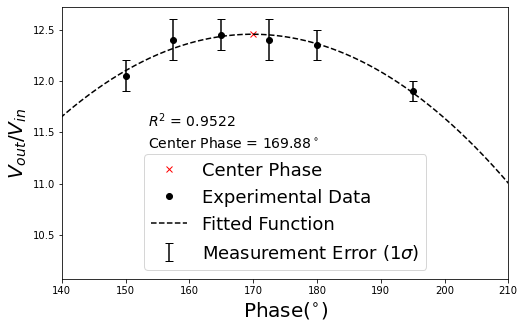

In [61]:
phase1 = np.array([150,157.5,165,172.5,180,195])
Vmin1 = np.array([1.19,1.22,1.23,1.22,1.22,1.18])
Vmax1 = np.array([1.22,1.26,1.26,1.26,1.25,1.2])
Vave1 = (Vmin1+Vmax1)/2
Verr1 = Vave1-Vmin1
Vin1 = []
for i in range(len(phase1)) :
    Vin1.append(0.1)

phase1 = np.array(phase1)
Vmin1 = np.array(Vmin1)
Vave1 = np.array(Vave1)

Voutarr1 = []
Gainarr1 = []
GainErrarr1 = []

for i in range(len(phase1)) :
    Voutarr1.append(ufloat(Vave1[i],Verr1[i]))
    print(ufloat(Vave1[i],Verr1[i]))
    uGain1 = Voutarr1[i]/Vin1[i]
    Gainarr1.append(uGain1.n)
    GainErrarr1.append(uGain1.s)
    print(uGain1)
Gainarr1 = np.array(Gainarr1)
Voutarr1 = np.array(Voutarr1)
GainErrarr1 = np.array(GainErrarr1)



#2차함수 fitting    
    
coeff11, res, rank, _, _=np.polyfit(phase1,Gainarr1,2,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx1 = np.linspace(120,220,500)
fitfunc1= f(coeff11,xx1)
r2 = r2_score(Gainarr1,f(coeff11,phase1)) # R^2 결정계수
print(f'결정계수 : {r2:.4f}')

idx = np.where(fitfunc1 == np.max(fitfunc1))


#plotting
fig = plt.figure(1,figsize=(8,5))
plt.plot(xx1[idx],fitfunc1[idx],'x',color='red',label='Center Phase')
plt.plot(phase1,Gainarr1,'o',color='black',label='Experimental Data')
plt.plot(xx1,fitfunc1,color='black',linestyle='--',label='Fitted Function')
plt.errorbar(phase1,Gainarr1,yerr=GainErrarr1,linestyle='None',capsize=4,label='Measurement Error (1$\\sigma$)',color='black')
plt.xlabel('Phase($^{\circ}$)',fontsize=20)
plt.ylabel('$V_{out}/V_{in}$',fontsize=20)
plt.legend(fontsize=18,loc='lower center')
plt.text(153.5,11.55,f'$R^2$ = {r2:.4f}',fontsize=14)
plt.text(153.5,11.35,f'Center Phase = {xx[idx][0]:.2f}$^\circ$',fontsize=14)
plt.xlim(140,210)
plt.savefig(savepath + 'exp6_fitted1.png', dpi=300)



### Noise $10^{-2}$

결정계수 : 0.9540


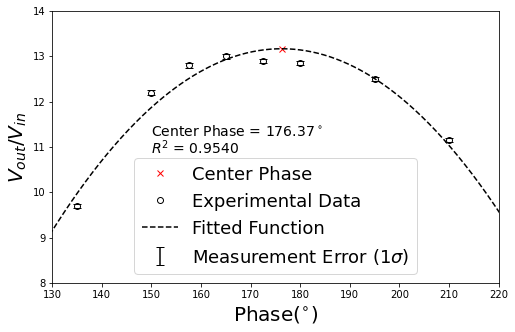

In [62]:
phase = np.array([135,150,157.5,165,172.5,180,195,210,])
Vmin = np.array([0.97,1.22,1.28,1.3,1.29,1.28,1.25,1.11,])
Vmax = np.array([0.97,1.22,1.28,1.3,1.29,1.29,1.25,1.12,])
Vave = (Vmin+Vmax)/2

Verr = []
Vin = []
for i in range(len(phase)) :
    Verr.append(0.005)
    Vin.append(0.1)

Voutarr = []
Gainarr = []
GainErrarr = []

#for i in range(len(phase)) :
#    Voutarr.append(ufloat(Vave[i],Verr[i]))
#    uGain = 20*umath.log10(Voutarr[i]/Vin[i])
#    Gainarr.append(uGain.n)
#    GainErrarr.append(uGain.s)
    
    
for i in range(len(phase)) :
    Voutarr.append(ufloat(Vave[i],Verr[i]))
    uGain = Voutarr[i]/Vin[i]
    Gainarr.append(uGain.n)
    GainErrarr.append(uGain.s)
    
    
Gainarr = np.array(Gainarr)
Voutarr = np.array(Voutarr)
GainErrarr = np.array(GainErrarr)



#2차함수 fitting    
    
coeff1, res, rank, _, _=np.polyfit(phase,Gainarr,2,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx = np.linspace(110,230,500)
fitfunc= f(coeff1,xx)
r2 = r2_score(Gainarr,f(coeff1,phase)) # R^2 결정계수
print(f'결정계수 : {r2:.4f}')

idx = np.where(fitfunc == np.max(fitfunc))


#plotting
fig = plt.figure(1,figsize=(8,5))
plt.plot(xx[idx],fitfunc[idx],'x',color='red',label='Center Phase',markerfacecolor='white')
plt.plot(phase,Gainarr,'o',color='black',label='Experimental Data',markerfacecolor='white')
plt.plot(xx,fitfunc,color='black',linestyle='--',label='Fitted Function')
plt.errorbar(phase,Gainarr,yerr=GainErrarr,linestyle='None',capsize=4,label='Measurement Error (1$\\sigma$)',color='black')
plt.xlabel('Phase($^{\circ}$)',fontsize=20)
plt.ylabel('$V_{out}/V_{in}$',fontsize=20)
plt.legend(fontsize=18,loc='lower center')
plt.text(150,10.85,f'$R^2$ = {r2:.4f}',fontsize=14)
plt.text(150,11.25,f'Center Phase = {xx[idx][0]:.2f}$^\circ$',fontsize=14)
plt.xlim(130,220)
plt.ylim(8,14)
plt.savefig(savepath + 'exp6_fitted2.png', dpi=300)

#plt.plot(phase1,Gainarr1,'o',color='red',label='Experimental Data')
#plt.plot(xx1,fitfunc1,color='red',linestyle='--',label='Fitted Function')
#plt.errorbar(phase1,Gainarr1,yerr=GainErrarr1,linestyle='None',capsize=4,label='Measurement Error (1$\\sigma$)',color='red')



# 7번실험 DC Offset 

In [ ]:
OffsetArr = np.array([0,100,200,300,400,500,600,700,800,900,1000,1100,])
#OffsetArr = OffsetArr/2080
OffsetArr = OffsetArr/1000
Vout = np.array([1.32,1.33,1.35,1.37,1.38,1.39,1.41,1.42,1.44,1.46,1.48,1.5,])

Vin = []
Verr = []
for i in range(len(OffsetArr)) :
    Vin.append(2.08)
    Verr.append(0.005)
    
Vin = np.array(Vin)  
Verr = np.array(Verr)

Voutarr = []
Gainarr = []
GainErrarr = []


#for i in range(len(OffsetArr)) :
#    Voutarr.append(ufloat(Vout[i],Verr[i]))
#    uGain = Voutarr[i]/Vin[i]
#    Gainarr.append(uGain.n)
#    GainErrarr.append(uGain.s)

for i in range(len(OffsetArr)) :
    Voutarr.append(ufloat(Vout[i],Verr[i]))
    uGain = Voutarr[i]
    Gainarr.append(uGain.n)
    GainErrarr.append(uGain.s)



# Fitting

coeff1, res, rank, _, _=np.polyfit(OffsetArr,Gainarr,1,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

r2 = r2_score(Gainarr,f(coeff1,OffsetArr)) # R^2 결정계수
print(f'결정계수 : {r2:.4f}')
    
fig = plt.figure(1,figsize=(8,5))
xx = np.linspace(-0.1,1.5)
fitfunc = f(coeff1,xx)
plt.plot(OffsetArr,Gainarr,'o',color='black',label='Experimental Data')
plt.plot(xx,fitfunc,color='black',linestyle='--',label='Fitted Function')
plt.errorbar(OffsetArr,Gainarr,yerr=GainErrarr,linestyle='None',capsize=4,label='Measurement Error (1$\\sigma$)',color='black')
plt.xlim(-0.05,1.2)
plt.xlabel('$V_{offset}$',fontsize=20)
plt.ylabel('$V_{out}$',fontsize=20)


#plt.text(0.15,-3.75,f'$R^2$ = {r2:.4f}',fontsize=13)
#plt.text(0.15,-3.85,f'20 $\\times$ log($V_{{in}}/V_{{out}}$) = {coeff1[0]:.2f} $\\times$ ($V_{{offset}}/V_{{in}}$) - {abs(coeff1[1]):.2f}',fontsize=13)
plt.legend(fontsize=20)

plt.text(0.6,1.335,f'$R^2$ = {r2:.4f}',fontsize=14)
plt.text(0.6,1.305,f'$V_{{out}}$ = 0.160 $\\times$ ($V_{{offset}}$) + {abs(coeff1[1]):.2f}',fontsize=14)
plt.savefig(savepath + 'exp7_fitted.png', dpi=300)




plt.show()

# 8번 실험 Hall Effect

In [132]:
def arctan(x) :
    anss = 0
    for i in range(100) :
        temp= (-1)**(i)*(x**(2*i+1))/(2*i+1)
        anss = anss+ temp
    return anss

In [58]:
Berr

array([1.35302554e+02, 1.66498074e+00, 1.21664416e-01, 1.67216085e-02,
       4.22921909e-03, 5.85199613e-04])

In [62]:
fiterr(dist[0])

(0.9+/-1.4)e+02


array([ 86.06135894, 135.30255433])

In [92]:
Berr

array([4.77267560e+113, 3.98113618e+051, 2.70424379e+013, 1.50793227e-002,
       4.22783166e-003, 5.85199432e-004])

(-0+/-5)e+113
(-0+/-4)e+51
(-0.1+/-2.7)e+13
0.215+/-0.015
0.073+/-0.004
0.0157+/-0.0006
[0.53190293 0.4321698  0.34410412 0.21464637 0.073486   0.01574331]
m값은 3.93이다.
m의 1시그마는 0.350이다.
[0.53190293 0.4321698  0.34410412 0.21464637 0.073486   0.01574331]
0.9746
[0.62233306 0.59773447 0.57245695 0.54680157 0.52104767 0.49544668
 0.47021793 0.44554649 0.42158296 0.39844479 0.37621879 0.3549644
 0.33471732 0.31549327 0.2972916  0.28009856 0.26389028 0.24863531
 0.23429677 0.22083416 0.20820475 0.19636473 0.18527017 0.17487763
 0.16514471 0.1560304  0.14749536 0.13950207 0.13201494 0.12500033
 0.11842657 0.11226393 0.10648456 0.10106242 0.09597321 0.09119429
 0.08670457 0.08248442 0.07851561 0.0747812  0.07126544 0.06795371
 0.06483246 0.06188907 0.05911187 0.05648999 0.05401335 0.05167259
 0.04945903 0.04736456 0.0453817  0.04350346 0.04172333 0.04003529
 0.03843371 0.03691335 0.03546932 0.03409709 0.03279241 0.03155133
 0.03037015 0.02924542 0.02817392 0.02715264 0.02617876 0.02524965
 0.

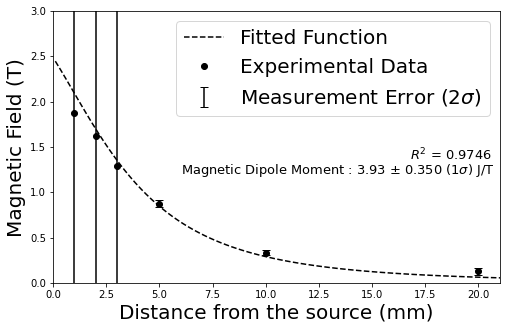

In [91]:
Vbase = -545
dist = np.array([1,2,3,5,10,20])
Vout = np.array([-500,-506,-514,-524,-537,-542])
Verr = np.array([0.5,0.5,0.5,0.5,0.5,1])/1000*125/3

Vfinal = Vout-Vbase
B = Vfinal*125/3/1000

logy = np.log10(Vfinal)
logx = np.log10(dist)
coeff1, res, rank, _, _=np.polyfit(dist,logy,1,full=True)

def f(coeff,x) :
    lenc=len(coeff)
    k = 0
    for i in range(lenc) :
        k += coeff[i]*x**(lenc-i-1)
    return k

xx = np.linspace(0.1,25,100)
fitfunc = 10**f(coeff1,xx)

## dipole moment 구하기

def fit(t) :
    A = 4*10**-7*10**9/(14*9*5)
    k = 63/(t*(4*t**2+277)**0.5)
    B = np.arctan(k)
    C = np.arctan(63/((t+5)*(4*(t+5)**2+277)**0.5))
    Ans = A*(B-C)
    print(Ans)
    return Ans


def fiterr(t) :
    t = ufloat(t,0.3)
    A = 4*10**-7*10**9/(14*9*5)
    k = 63/(t*(4*t**2+277)**0.5)
    B = arctan(k)
    C = arctan(63/((t+5)*(4*(t+5)**2+277)**0.5))
    Ans = A*(B-C)
    print(Ans)
    return np.array([Ans.n,Ans.s])


# dist 재정의
Barr = []
Berr = []
for i in range(len(dist)) :
    temp = fiterr(dist[i])
    Barr.append(temp[0])
    Berr.append(temp[1])
                
Berr = np.array(Berr)
Barr = np.array(Barr)

#print(fit(3))

m = (125/3 *Vfinal/1000)/(fit(dist))
mreal = m[0:5]


mmean = np.mean(mreal)
mstd = np.std(mreal)

print(f'm값은 {mmean:.2f}이다.')
print(f'm의 1시그마는 {mstd:.3f}이다.')





## R^2 구하기

r2 = r2_score(B,mmean*fit(dist)) # R^2 결정계수
print(f'{r2:.4f}')

##


fig = plt.figure(1,figsize=(8,5))
plt.plot(xx,mmean*fit(xx),linestyle='--',color='black',label='Fitted Function')
fig = plt.figure(1,figsize=(8,5))
plt.plot(dist,B,'o',color='black',label='Experimental Data')
plt.errorbar(dist,B,yerr=Verr + Berr,linestyle='None',capsize=4,label='Measurement Error (2$\\sigma$)',color='black')
plt.xlabel('Distance from the source (mm)',fontsize=20)
plt.ylabel('Magnetic Field (T)',fontsize=20)
#plt.yscale('log')
#plt.xscale('log')
plt.text(16.8,1.35,f'$R^2$ = {r2:.4f}',fontsize=13)
plt.text(6,1.2,f'Magnetic Dipole Moment : {mmean:.2f} $\pm$ 0.350 ($1\sigma$) J/T',fontsize=13)
plt.xlim(0,21)
plt.ylim(0,3)
plt.legend(fontsize=20)
plt.savefig(savepath + 'exp8_fitted.png', dpi=300)

plt.show()

In [46]:
print(fit(3)[)

0.49+/-0.12
0.12166441561392402
